In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from xgboost import XGBRegressor
import pickle

**Importing Dataset**

In [2]:
df=pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [4]:
df_test.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


**EDA (Univariate, Multivariate, kde , pearson corelation)**

In [5]:
pd.set_option("display.max_columns", 2000)                              # To show the all columns
pd.set_option("display.max_rows", 85)

In [6]:
df['Fireplaces'].value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

In [7]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
df.select_dtypes(include=['int64', 'float64']).columns                    #  selecting all numerical columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [9]:
df.select_dtypes(exclude=['int64', 'float64']).columns                    # Selecting all catagorical columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [10]:
df = df.set_index("Id")                         # Set index as Id column

In [11]:
df.shape

(1460, 80)

In [12]:
df.head(1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


In [13]:
df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending=False)  # Selecting all columns having null values with number of null values

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

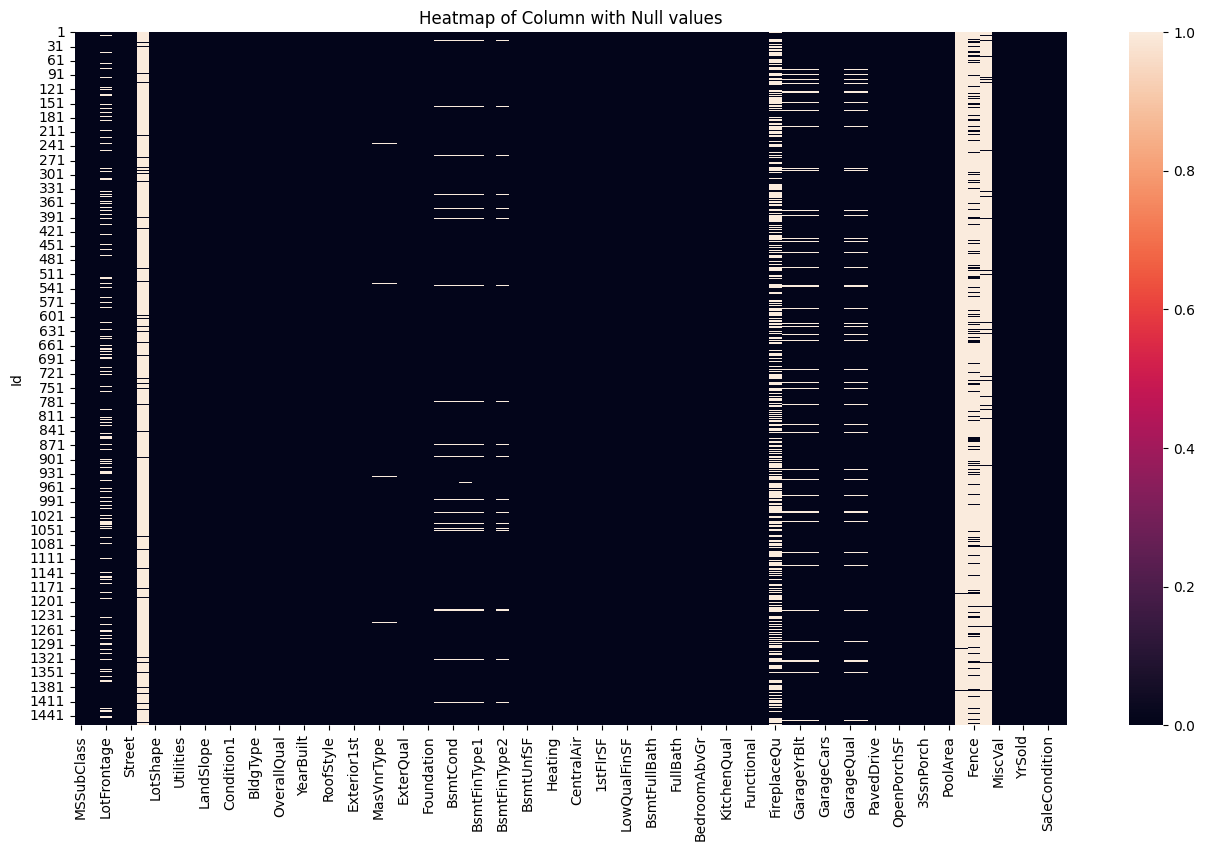

In [14]:
plt.figure(figsize=(16,9))   ;                    # plotting the null values using heatmap
sns.heatmap(df.isnull());
plt.title("Heatmap of Column with Null values")
plt.show()

In [15]:
# PoolQC , MiscFeature , Alley , Fence and FireplaceQu feature has maximum null values out of 1460 values.

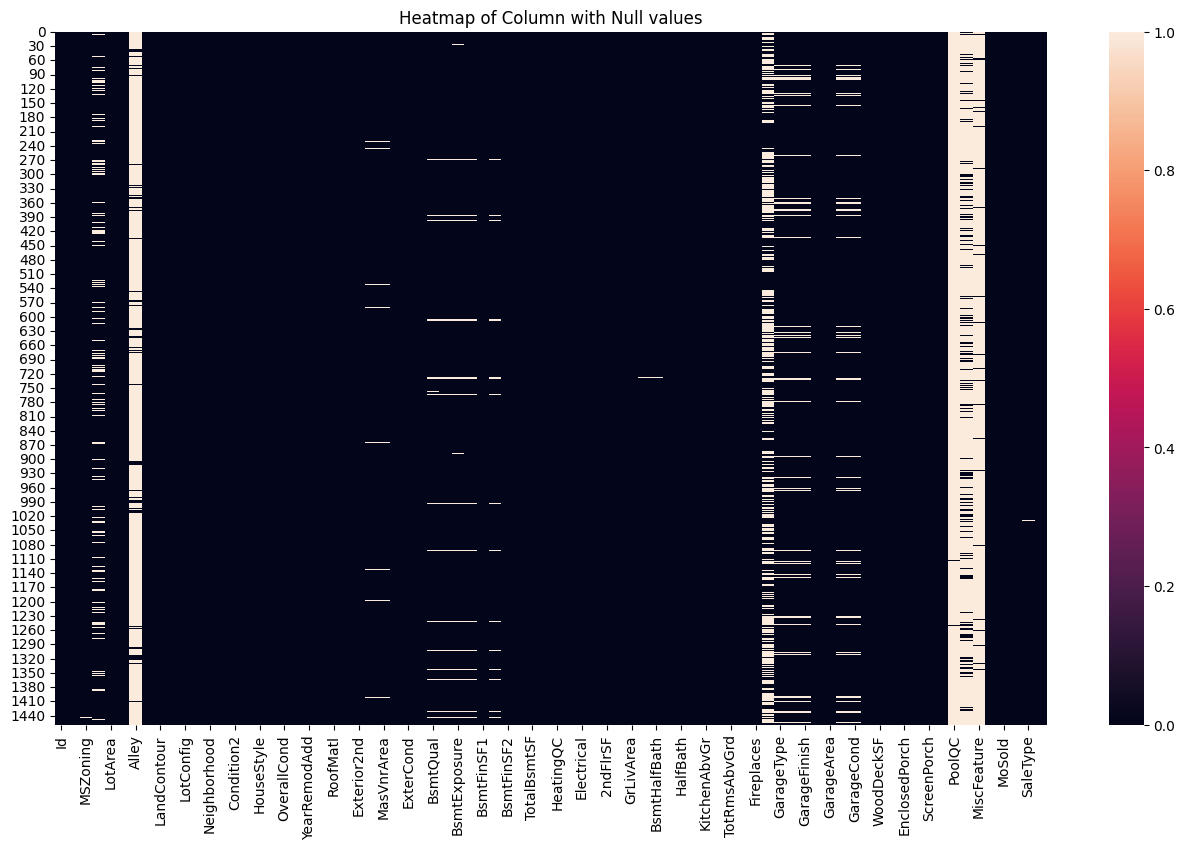

In [16]:
plt.figure(figsize=(16,9))   ;                    # plotting the null values using heatmap
sns.heatmap(df_test.isnull());
plt.title("Heatmap of Column with Null values")
plt.show()

In [17]:
df.drop(columns=['PoolQC','MiscFeature','Alley','Fence',"FireplaceQu"],axis=1,inplace=True)
df_test.drop(columns=['PoolQC','MiscFeature','Alley','Fence',"FireplaceQu"],axis=1,inplace=True)

In [18]:
df.shape

(1460, 75)

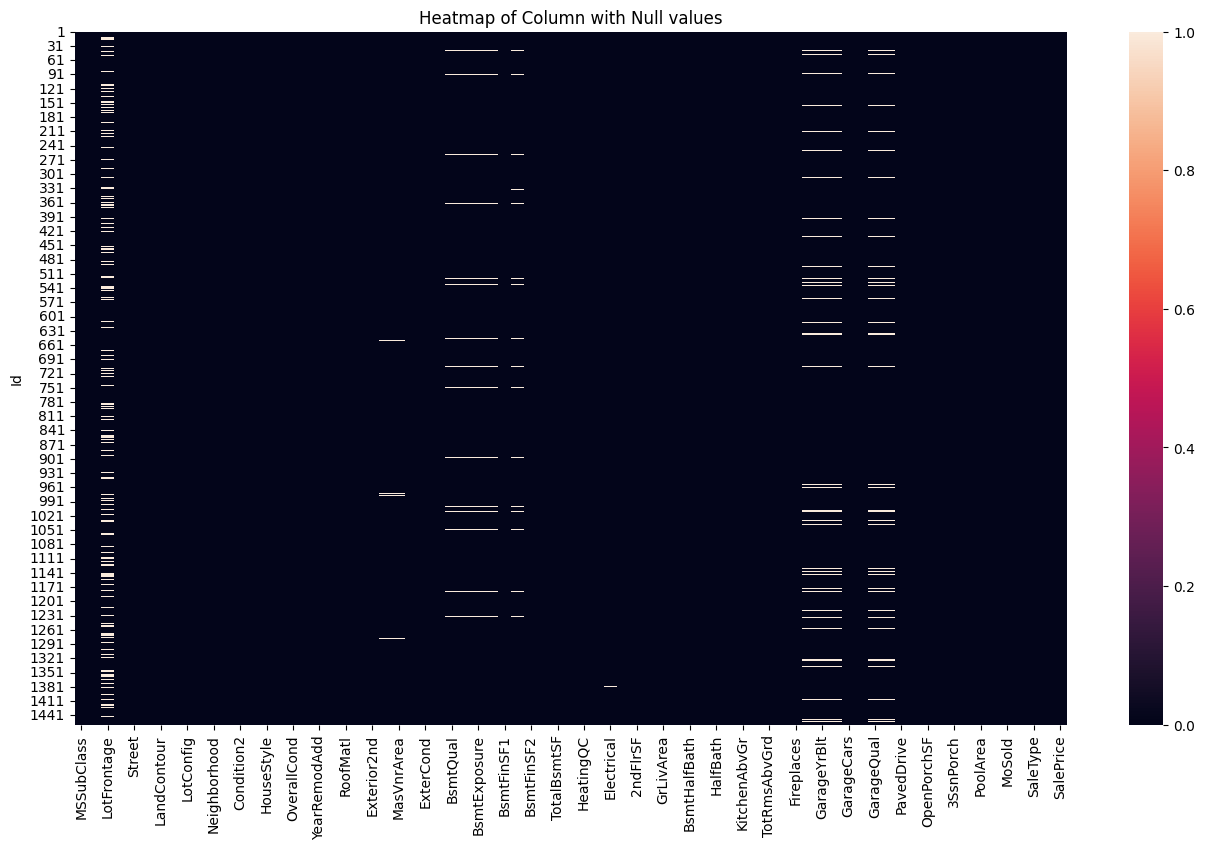

In [19]:
plt.figure(figsize=(16,9))  ;                     # plotting the null values using heatmap after removing columns with max null values
sns.heatmap(df.isnull());
plt.title("Heatmap of Column with Null values")
plt.show()

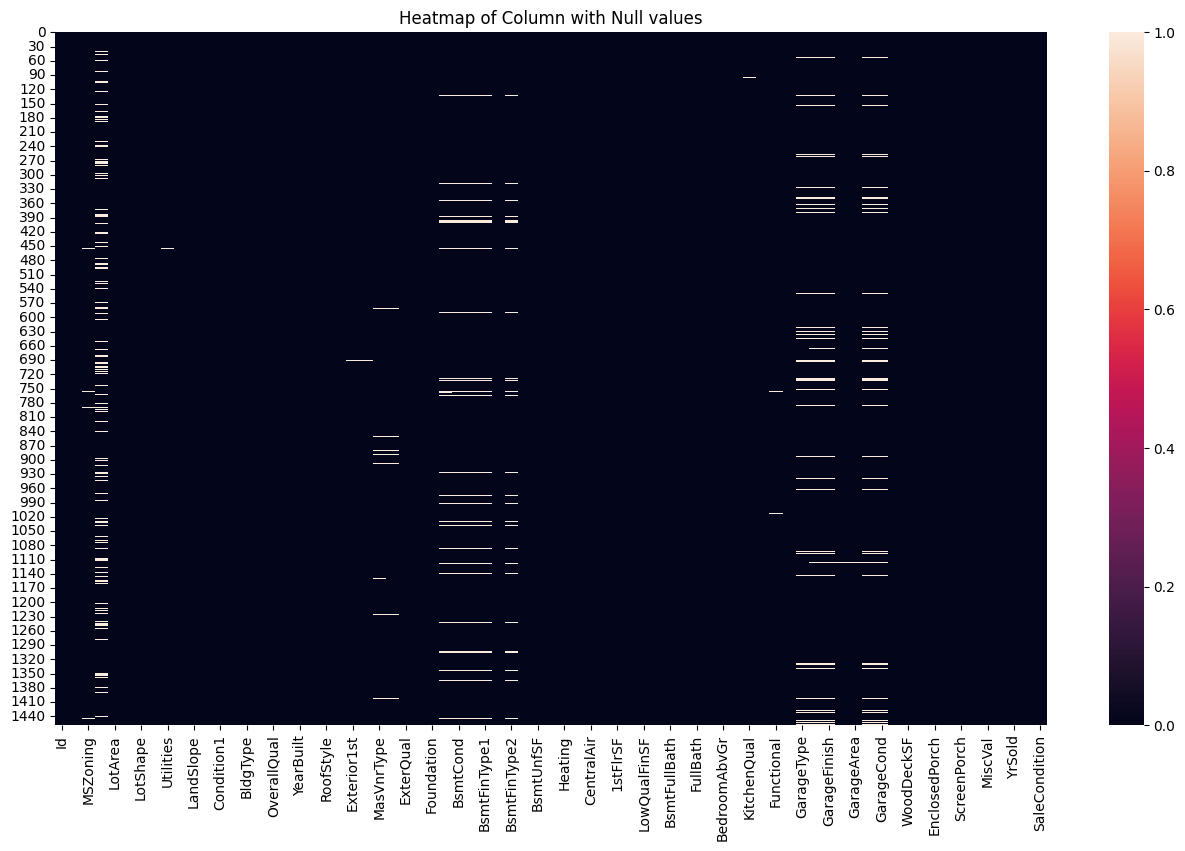

In [20]:
plt.figure(figsize=(16,9))  ;                     # plotting the null values using heatmap after removing columns with max null values
sns.heatmap(df_test.isnull());
plt.title("Heatmap of Column with Null values")
plt.show()

<ipython-input-21-fb9ab1555513>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap = "cividis", annot=True, linewidth=2)  ;    # plotting correlation matrix


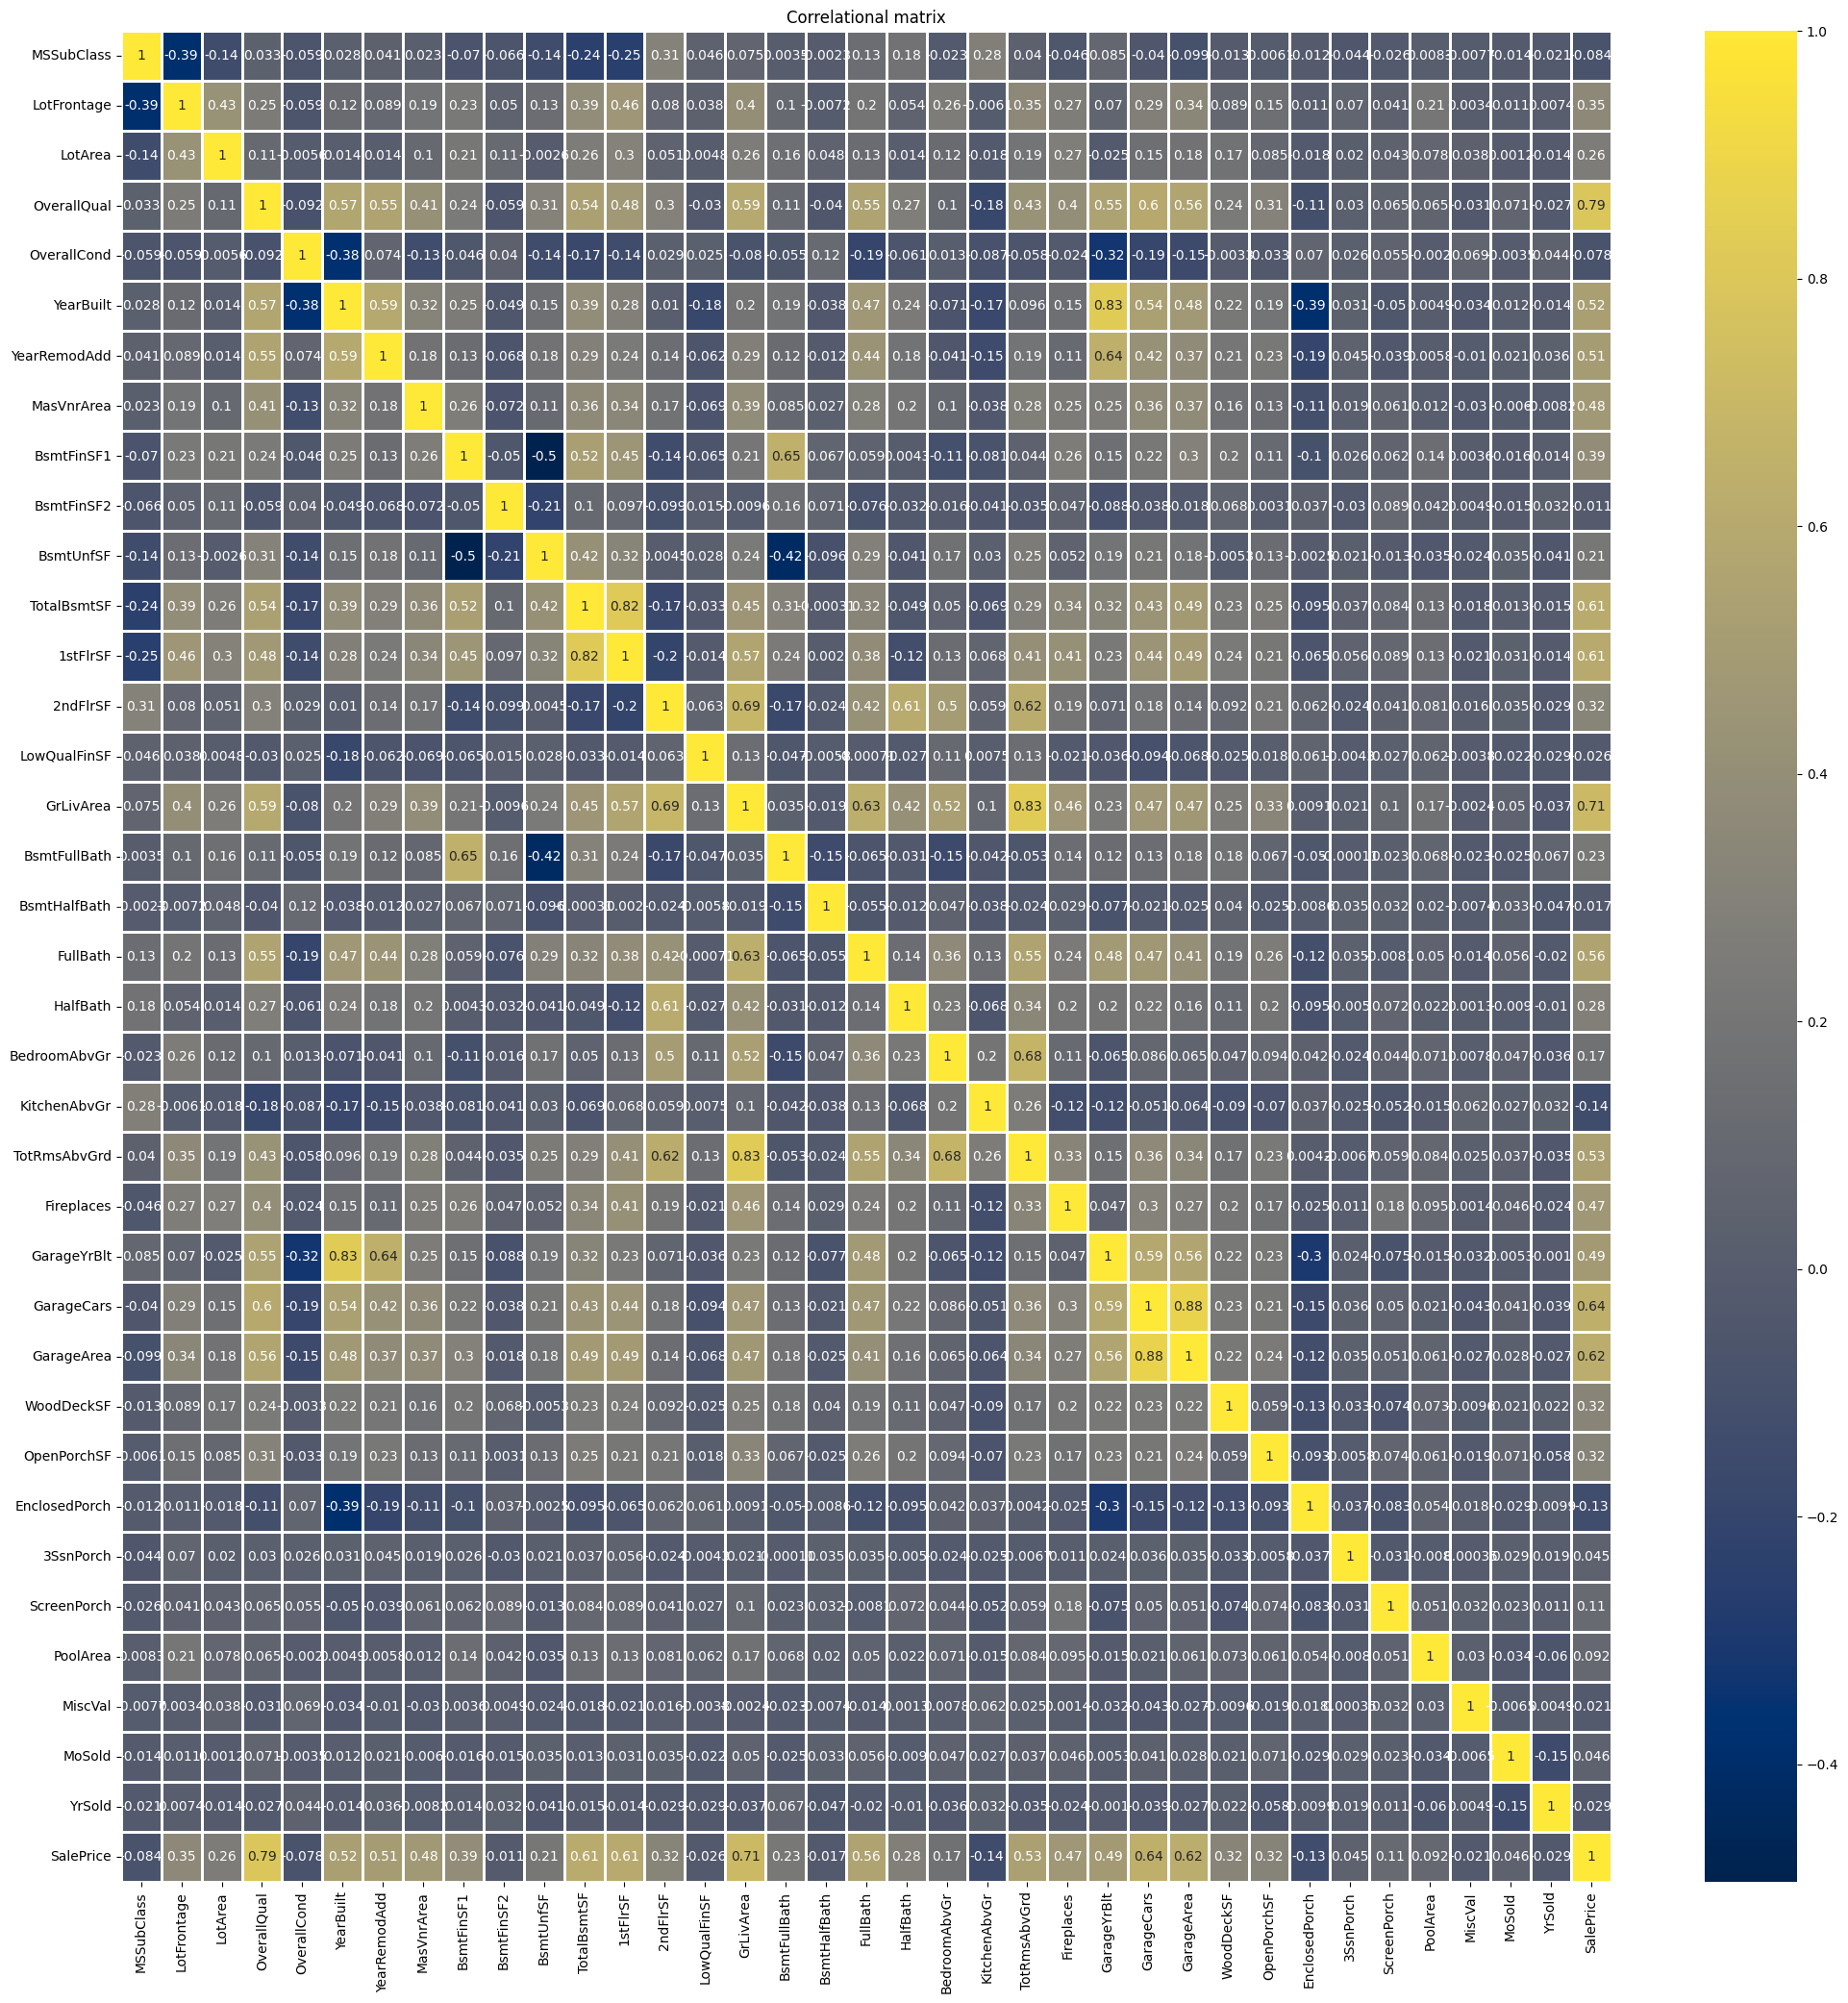

In [21]:
plt.figure(figsize=(25,25));
sns.heatmap(df.corr(), cmap = "cividis", annot=True, linewidth=2)  ;    # plotting correlation matrix
plt.title("Correlational matrix")
plt.show()

In [22]:
strng_corr = df.corr()
strng_corr_features = strng_corr.index[abs(strng_corr["SalePrice"]) >= 0.5]   # Fetching the features which has max strong correlaton with target feature
print(strng_corr_features)

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')


<ipython-input-22-b55c876d1d4f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  strng_corr = df.corr()


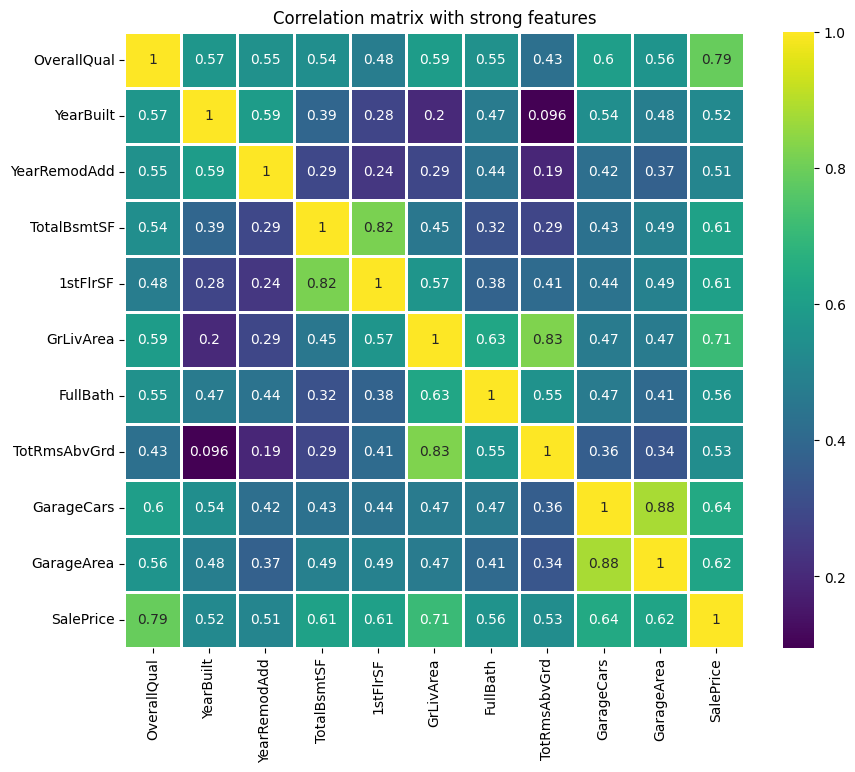

In [23]:
plt.figure(figsize=(10,8));
sns.heatmap(df[strng_corr_features].corr(), cmap = "viridis", annot=True, linewidth=2)  ;   # plotting with help of correlation matrix
plt.title("Correlation matrix with strong features")
plt.show()

In [24]:
# OverallQual has the maximum strong relation with Target feature SalePrice i.e- 0.79

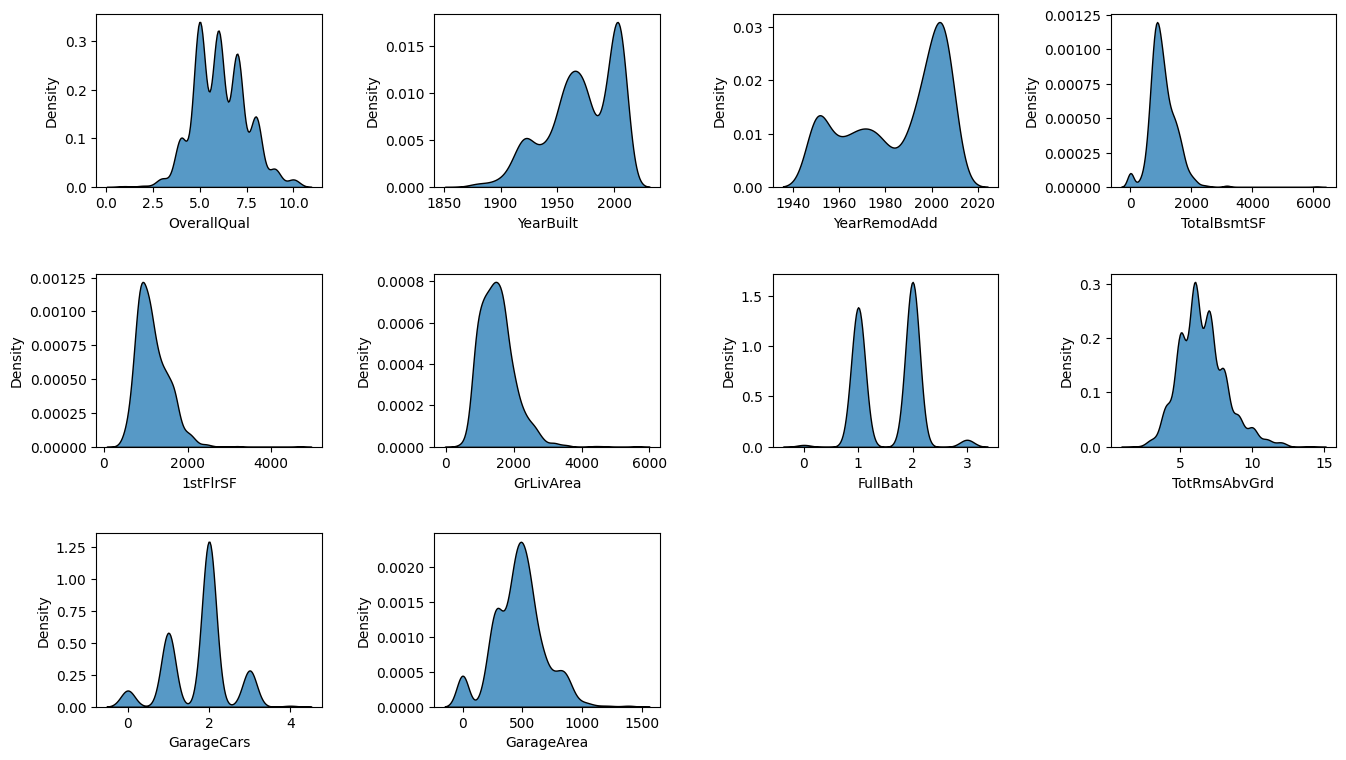

In [25]:
plt.figure(figsize=(16,9));
for i in range(len(strng_corr_features)):
    if i <= 9:
        plt.subplot(3,4,i+1);
        plt.subplots_adjust(hspace = 0.5, wspace = 0.5);
        sns.kdeplot(data=df, x = strng_corr_features[i],multiple='stack');    # univariate analysis

<Axes: xlabel='SalePrice', ylabel='Density'>

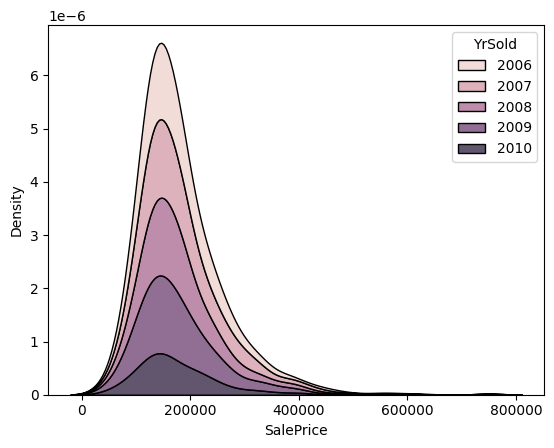

In [26]:
sns.kdeplot(data=df,x="SalePrice",hue="YrSold",multiple="stack")

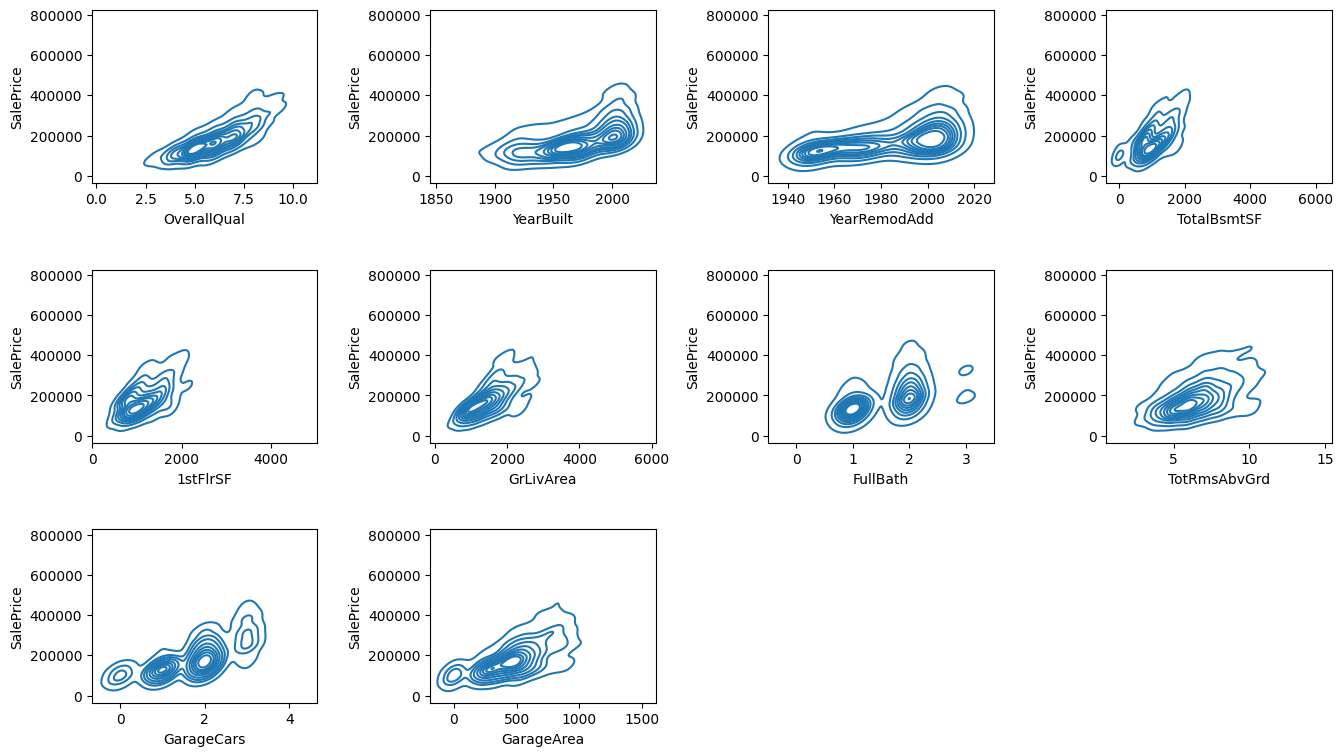

In [27]:
plt.figure(figsize=(16,9));
for i in range(len(strng_corr_features)):
    if i <= 9:
        plt.subplot(3,4,i+1);
        plt.subplots_adjust(hspace = 0.5, wspace = 0.5);
        sns.kdeplot(data=df, x = strng_corr_features[i], y = 'SalePrice');

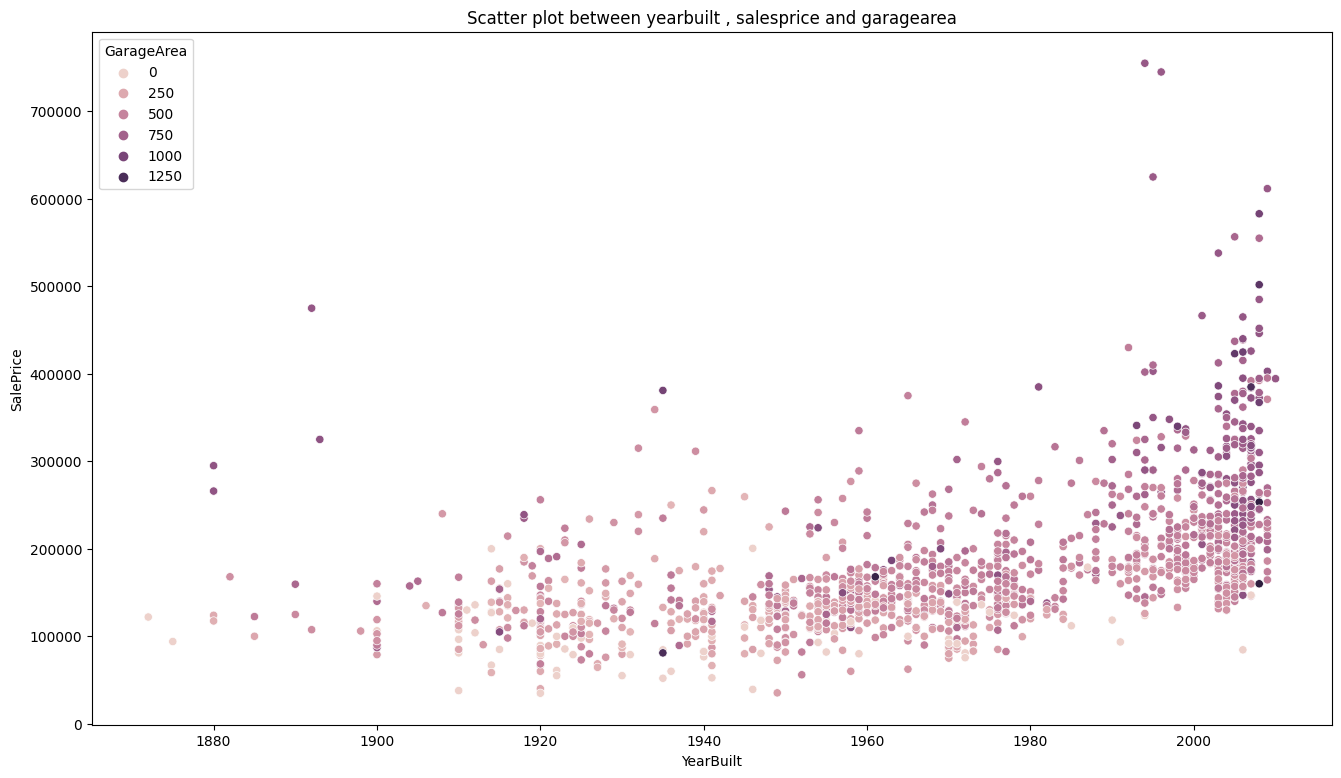

In [28]:
plt.figure(figsize=[16,9]);
sns.scatterplot(x=df['YearBuilt'],y=df['SalePrice'],hue=df['GarageArea']);
plt.title("Scatter plot between yearbuilt , salesprice and garagearea");

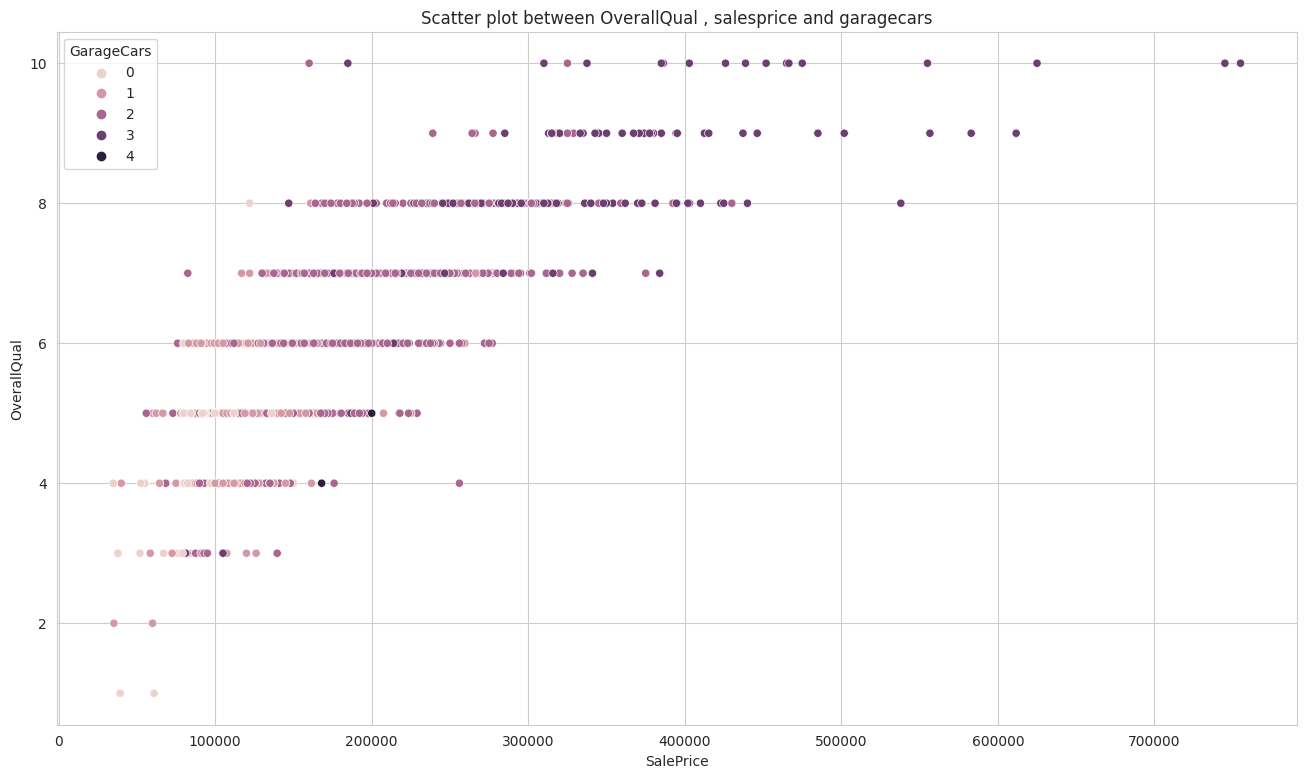

In [29]:
plt.figure(figsize=[16,9]);
sns.set_style('whitegrid')
sns.set_palette('Set2')
sns.scatterplot(y=df['OverallQual'],x=df['SalePrice'],hue=df['GarageCars']);
plt.title("Scatter plot between OverallQual , salesprice and garagecars");

**Data Preprocessing (Imputation, Creating 2 new features)**

In [30]:
# imputation

In [31]:
null_ft=df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending=False)
null_ft

LotFrontage     259
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
BsmtExposure     38
BsmtFinType2     38
BsmtQual         37
BsmtCond         37
BsmtFinType1     37
MasVnrType        8
MasVnrArea        8
Electrical        1
dtype: int64

In [32]:
df.shape

(1460, 75)

In [33]:
df_test.isnull().sum()[df_test.isnull().sum()>0].sort_values(ascending=False)

LotFrontage     227
GarageYrBlt      78
GarageCond       78
GarageQual       78
GarageFinish     78
GarageType       76
BsmtCond         45
BsmtQual         44
BsmtExposure     44
BsmtFinType1     42
BsmtFinType2     42
MasVnrType       16
MasVnrArea       15
MSZoning          4
BsmtFullBath      2
BsmtHalfBath      2
Utilities         2
Functional        2
GarageCars        1
GarageArea        1
BsmtUnfSF         1
KitchenQual       1
TotalBsmtSF       1
BsmtFinSF2        1
BsmtFinSF1        1
Exterior2nd       1
Exterior1st       1
SaleType          1
dtype: int64

In [34]:
LotFrontage_median = df['LotFrontage'].median()
df['LotFrontage'].fillna(LotFrontage_median,inplace=True)
df_test['LotFrontage'].fillna(df_test['LotFrontage'].median(),inplace = True)

In [35]:
GarageYrBlt_mean =df['GarageYrBlt'].mean()
df['GarageYrBlt'].fillna(GarageYrBlt_mean,inplace=True)
df_test['GarageYrBlt'].fillna(df_test['GarageYrBlt'].median(),inplace = True)

In [36]:
df['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [37]:
df['BsmtCond'].fillna('TA',inplace=True)
df_test['BsmtCond'].fillna('TA',inplace=True)

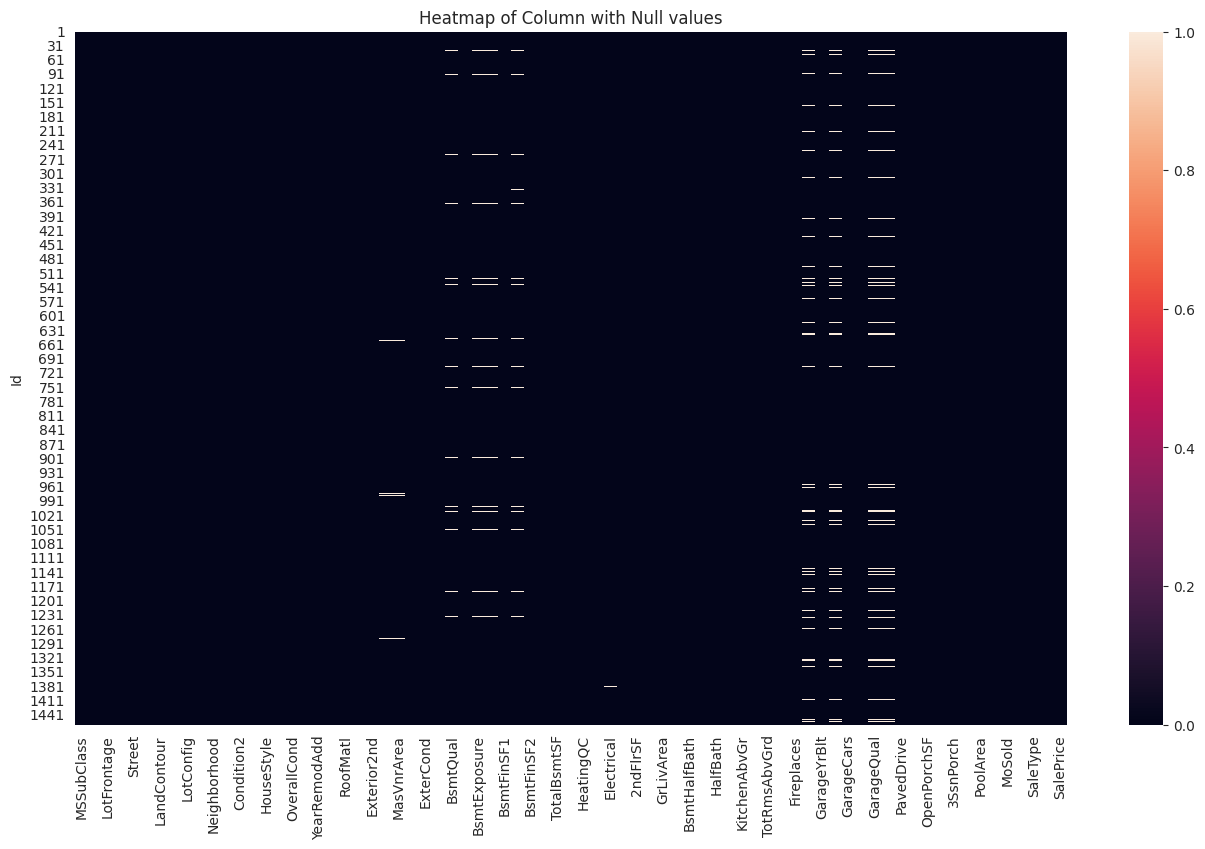

In [38]:
plt.figure(figsize=(16,9))  ;
sns.heatmap(df.isnull());
plt.title("Heatmap of Column with Null values")
plt.show()

In [39]:
# 1st New feature

In [40]:
df['Total_Bath']=df['BsmtFullBath']+df['BsmtHalfBath']+df['FullBath']+df['HalfBath']
df_test['Total_Bath']=df_test['BsmtFullBath']+df_test['BsmtHalfBath']+df_test['FullBath']+df_test['HalfBath']

In [41]:
# 2nd New feature

In [42]:
df['Total_qual']=df['OverallQual']+df['OverallCond']
df_test['Total_qual']=df_test['OverallQual']+df_test['OverallCond']

In [43]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [44]:
# Dropping unnecessary columns

In [45]:
df.drop(columns=['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'],axis=1,inplace=True)
df_test.drop(columns=['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'],axis=1,inplace=True)

In [46]:
df.shape

(1460, 71)

In [47]:
df_test.shape

(1459, 71)

In [48]:
strng_corr = df.corr()
strng_corr_features = strng_corr.index[abs(strng_corr["SalePrice"]) >= 0.5]   # Fetching the features which has max strong correlaton with target feature
print(strng_corr_features)

Index(['YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice', 'Total_Bath',
       'Total_qual'],
      dtype='object')


<ipython-input-48-b55c876d1d4f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  strng_corr = df.corr()


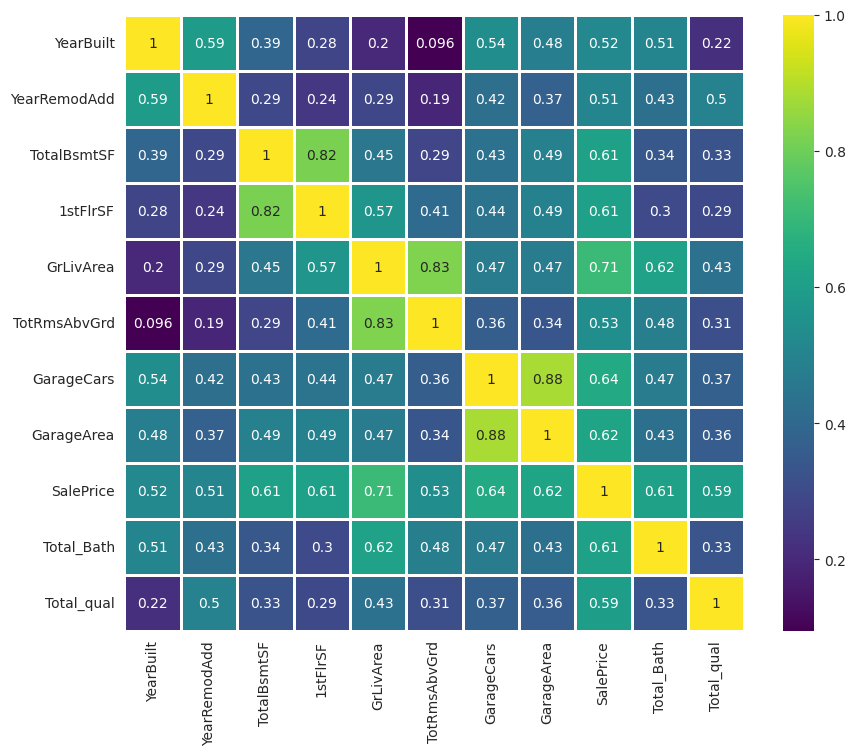

In [49]:
plt.figure(figsize=(10,8));
sns.heatmap(df[strng_corr_features].corr(), cmap = "viridis", annot=True, linewidth=2);   # plotting new features in correlation matrix


In [50]:
# two new features Total_Bath and Total_qual has postive correlation of 0.61 and 0.59 with the target feature i.e Saleprice.

In [51]:
# Creating new dataframe and segregeting dependent and independent or target variable

In [72]:
df_new = df[['Total_qual','YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'Total_Bath','SalePrice'
       ]].copy()


df_test_new = df_test[['Total_qual','YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'Total_Bath'
       ]].copy()

In [68]:
df_test_new.isnull().sum()

Total_qual      0
YearBuilt       0
YearRemodAdd    0
TotalBsmtSF     1
1stFlrSF        0
GrLivArea       0
TotRmsAbvGrd    0
GarageCars      1
GarageArea      1
Total_Bath      2
dtype: int64

In [69]:
df_test_new['TotalBsmtSF'].fillna(df_test_new['TotalBsmtSF'].median().round(),inplace = True)
df_test_new['GarageArea'].fillna(df_test_new['GarageArea'].median().round(),inplace = True)
df_test_new['GarageCars'].fillna(df_test_new['GarageCars'].median().round(),inplace = True)
df_test_new['Total_Bath'].fillna(df_test_new['Total_Bath'].median().round(),inplace = True)

In [55]:
df_test_new.isnull().sum()

Total_qual      0
YearBuilt       0
YearRemodAdd    0
TotalBsmtSF     0
1stFlrSF        0
GrLivArea       0
TotRmsAbvGrd    0
GarageCars      0
GarageArea      0
Total_Bath      0
dtype: int64

In [73]:
df_new.head(2)

,Total_qual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,TotRmsAbvGrd,GarageCars,GarageArea,Total_Bath,SalePrice
Id,,,,,,,,,,,
1,12,2003,2003,856,856,1710,8,2,548,4,208500
2,14,1976,1976,1262,1262,1262,6,2,460,3,181500


In [57]:
df_new.shape

(1460, 10)

In [58]:
df_test_new.shape

(1459, 10)

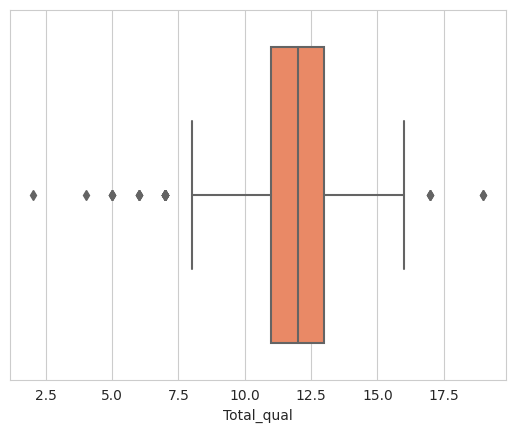

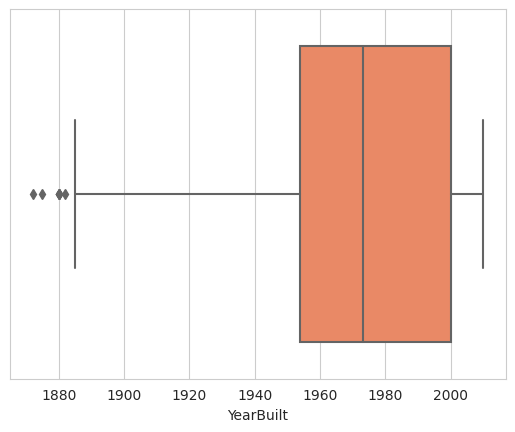

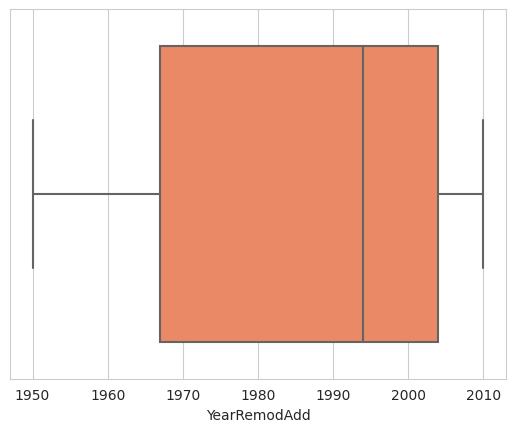

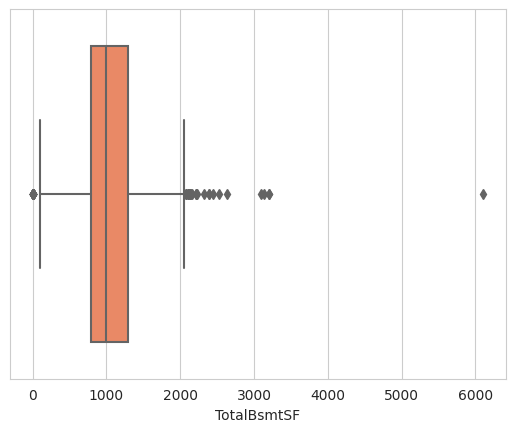

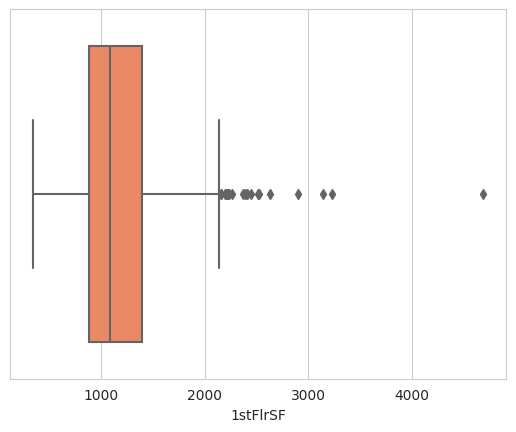

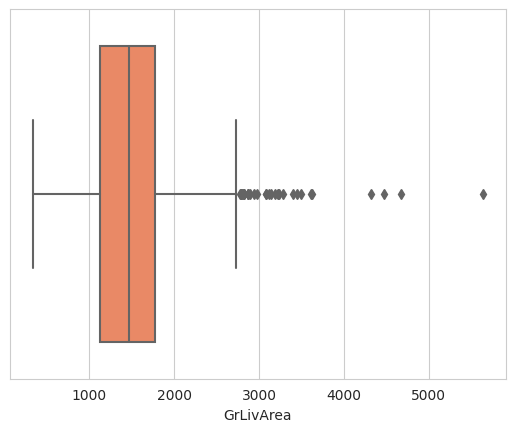

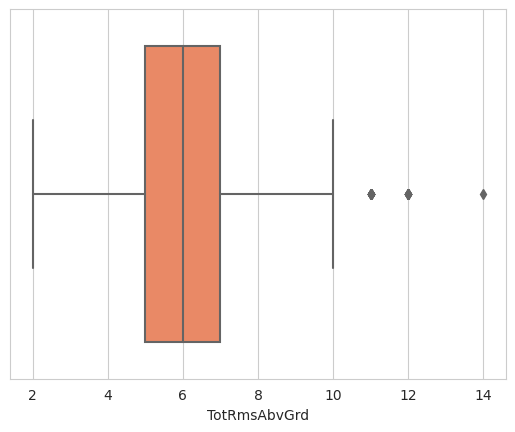

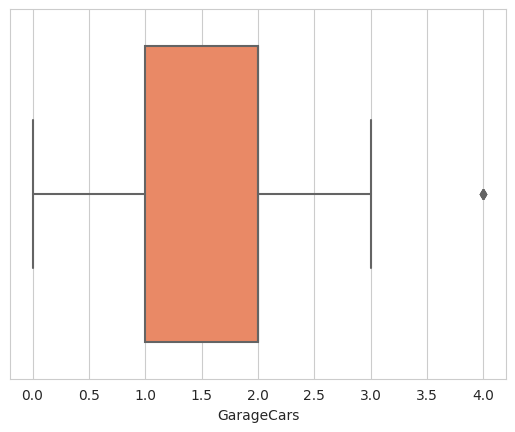

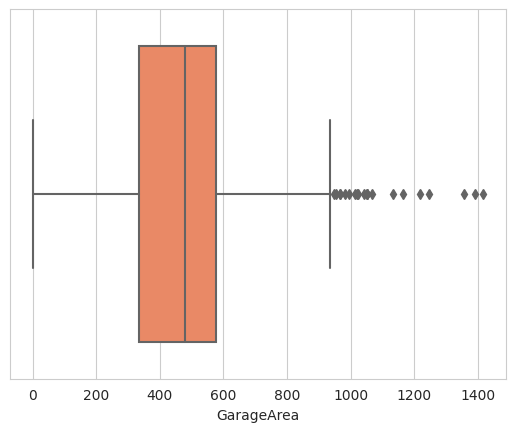

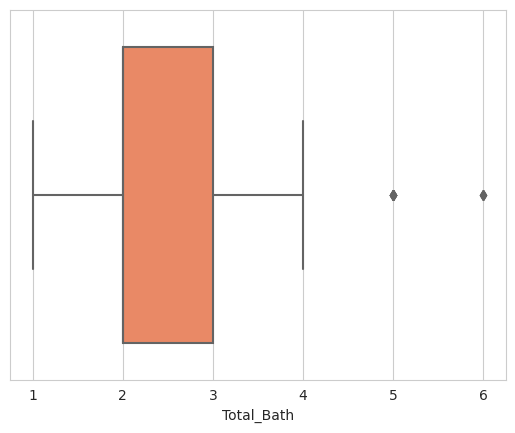

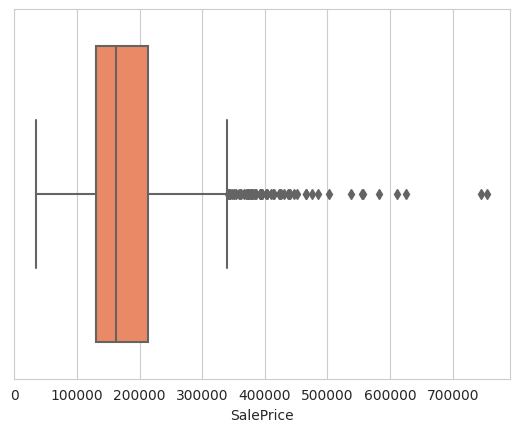

In [75]:
for i in df_new:
    sns.boxplot(x= df_new[i],color = 'coral')
    plt.xlabel(i)
    plt.show()

In [76]:
def capping_iqr(Dataframe):
    q1 = Dataframe.quantile(.25)
    q3 = Dataframe.quantile(.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5*iqr
    lower_bound = q1 - 1.5*iqr
    return upper_bound ,lower_bound


In [77]:
for i in df_new:
    upper_bound , lower_bound = capping_iqr(df_new[i])
    df_new[i] = np.where(
        df_new[i] > upper_bound,
        upper_bound,
        np.where(
            df_new[i]<lower_bound,
            lower_bound,
            df_new[i]
        )

    )

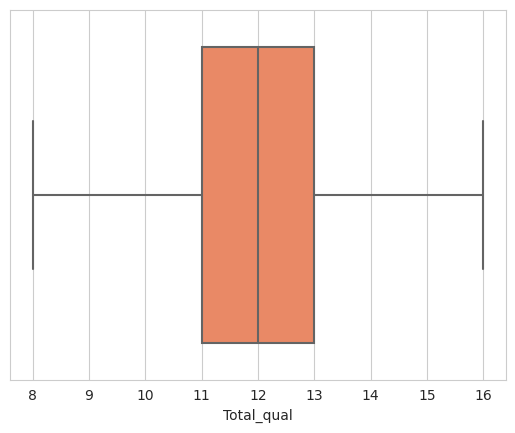

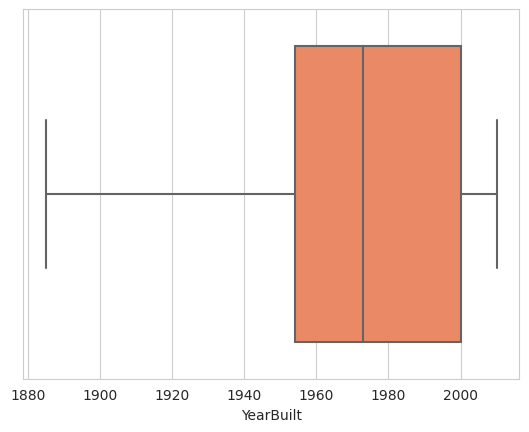

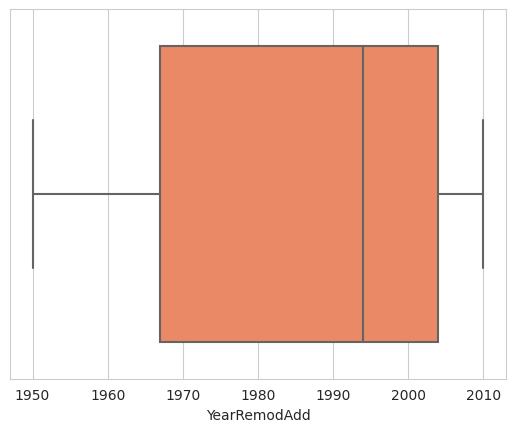

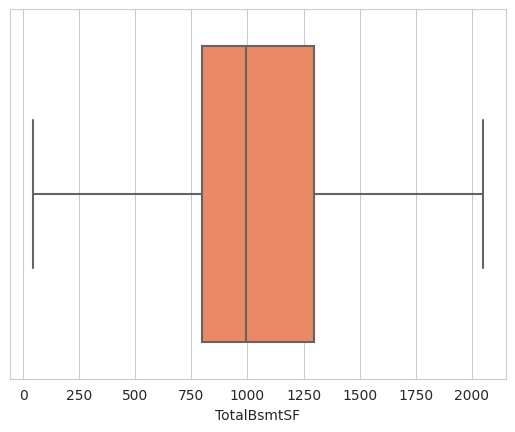

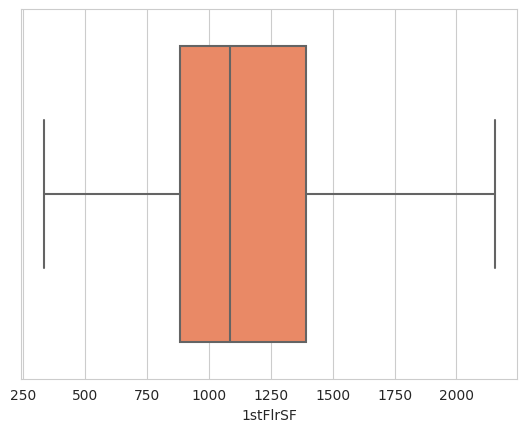

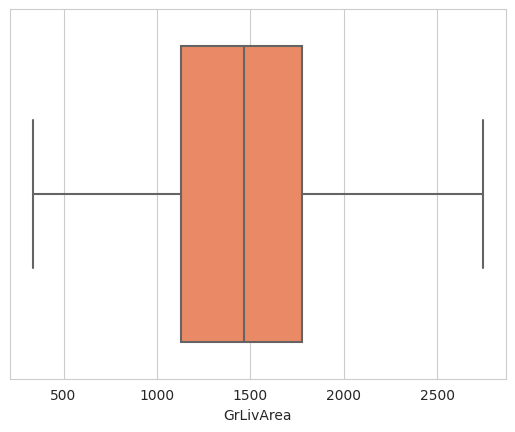

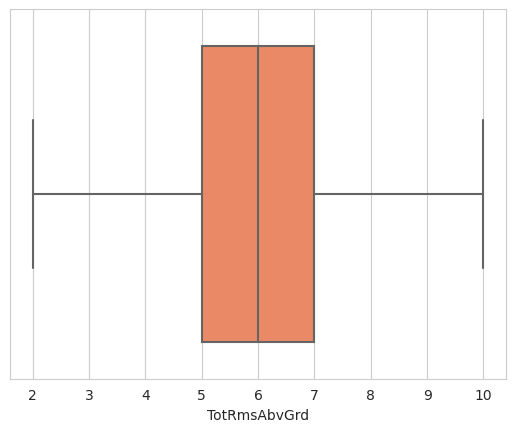

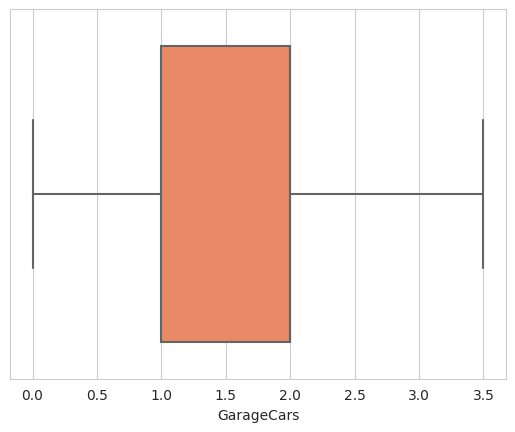

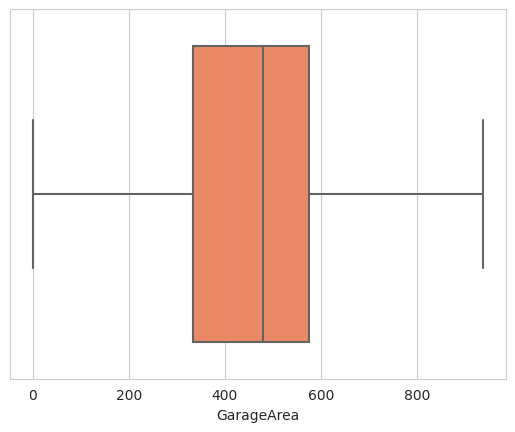

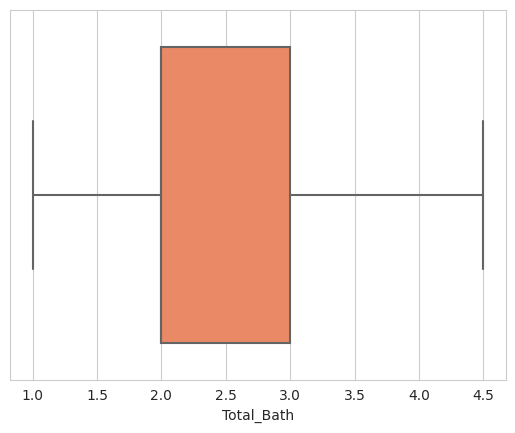

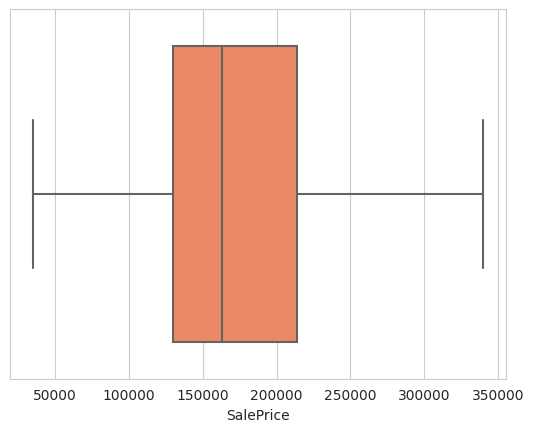

In [78]:
for i in df_new:
    sns.boxplot(x= df_new[i],color = 'coral')
    plt.xlabel(i)
    plt.show()

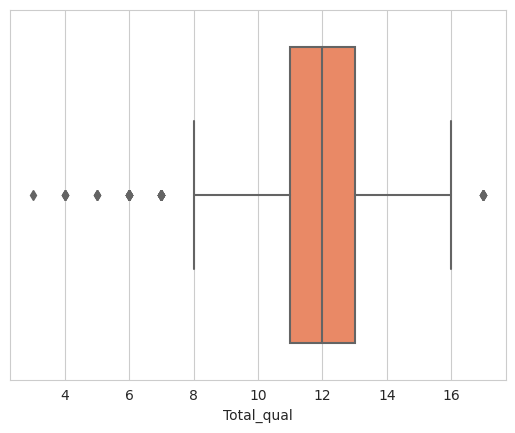

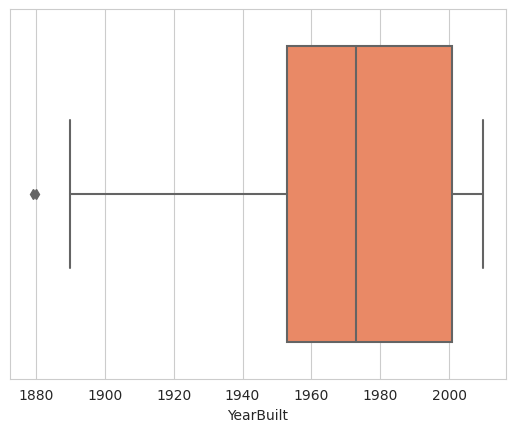

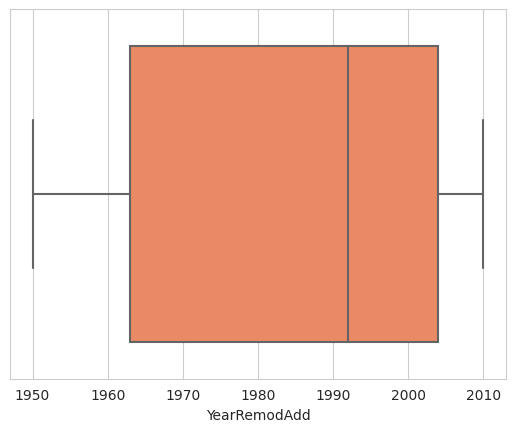

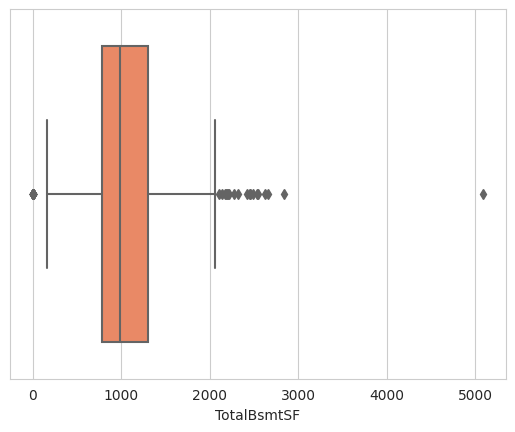

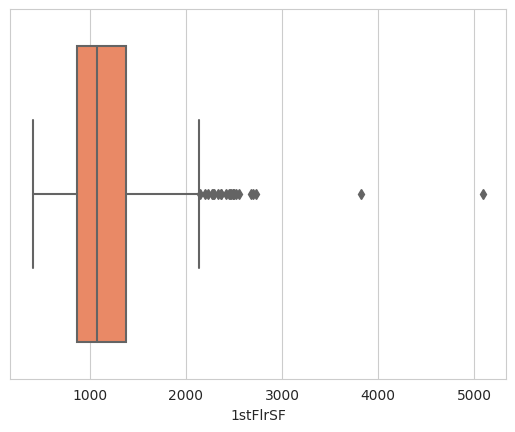

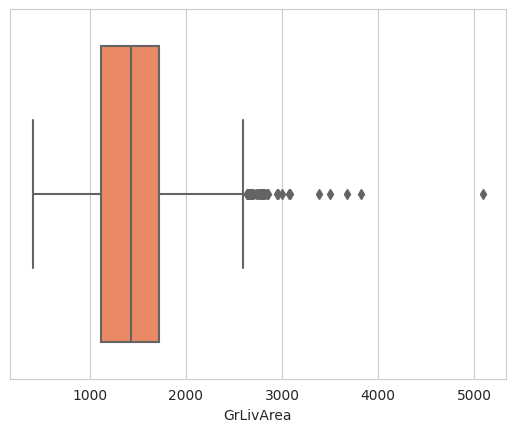

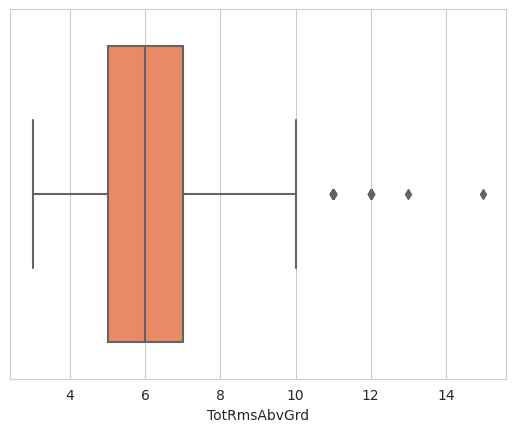

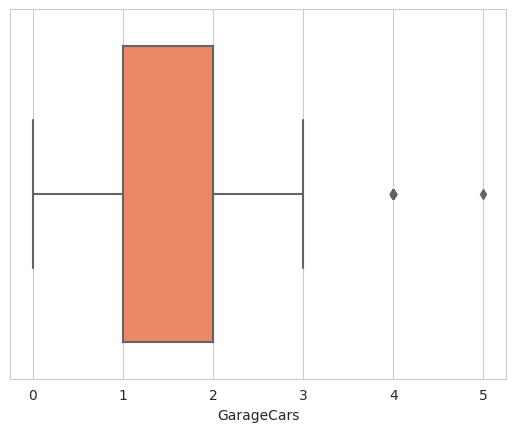

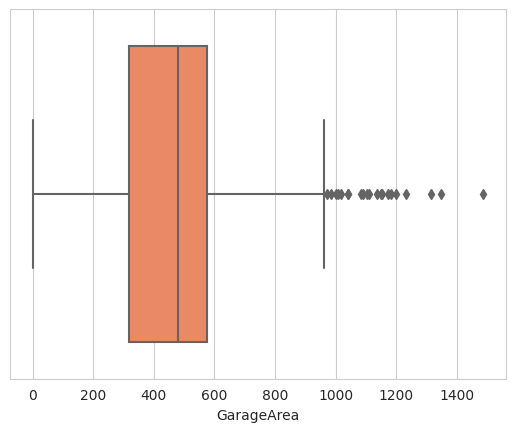

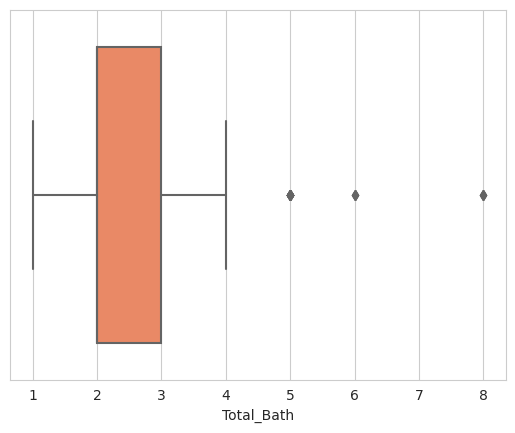

In [66]:
# Test data outliers
for i in df_test_new:
    sns.boxplot(x= df_test_new[i],color = 'coral')
    plt.xlabel(i)
    plt.show()

In [ ]:
for i in df_test_new:
    upper_bound , lower_bound = capping_iqr(df_test_new[i])
    df_test_new[i] = np.where(
        df_test_new[i] > upper_bound,
        upper_bound,
        np.where(
            df_test_new[i]<lower_bound,
            lower_bound,
            df_test_new[i]
        )

    )

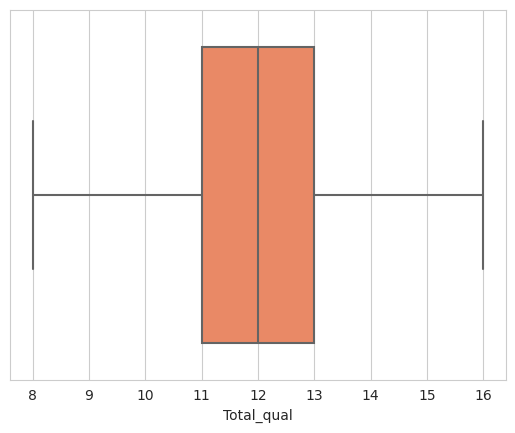

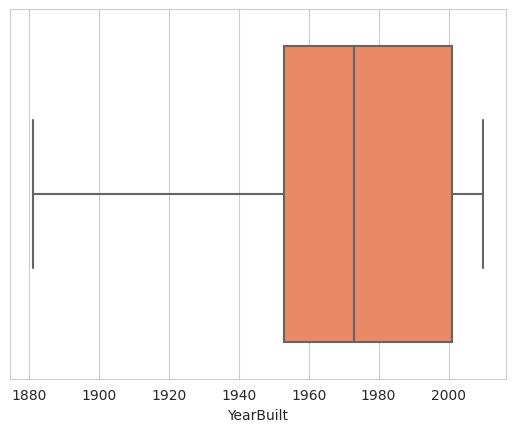

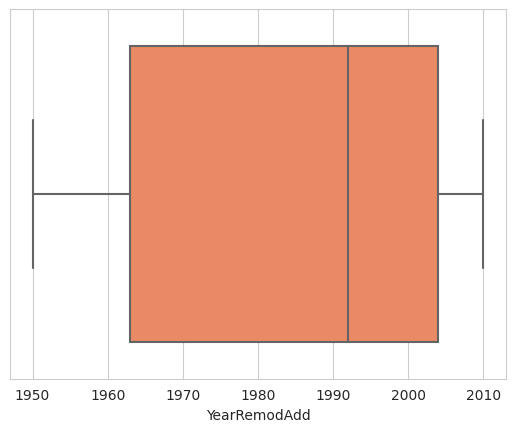

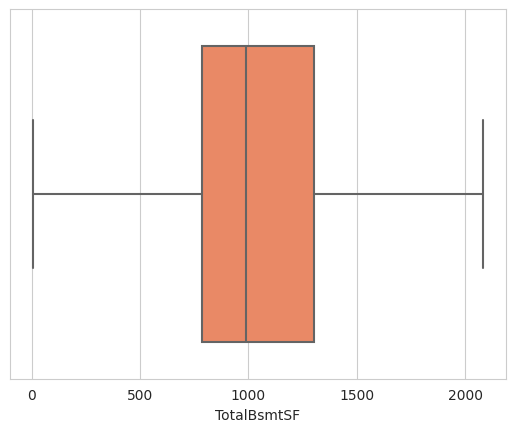

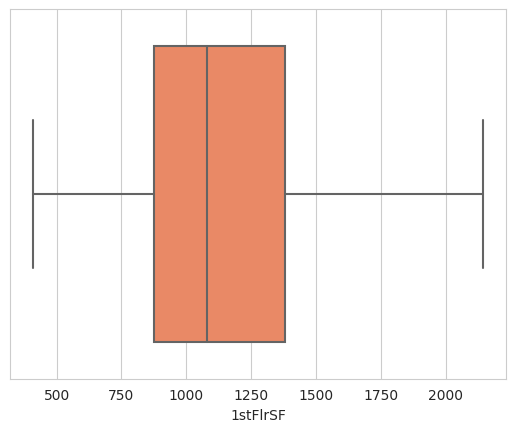

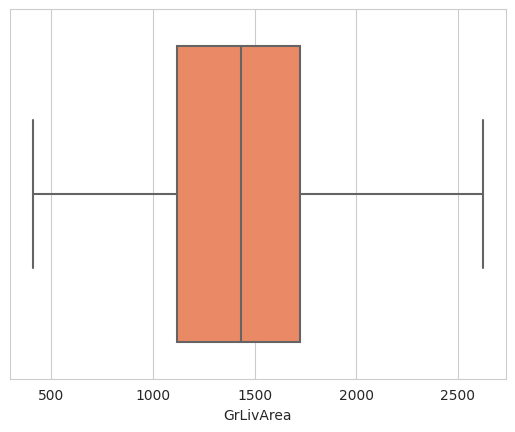

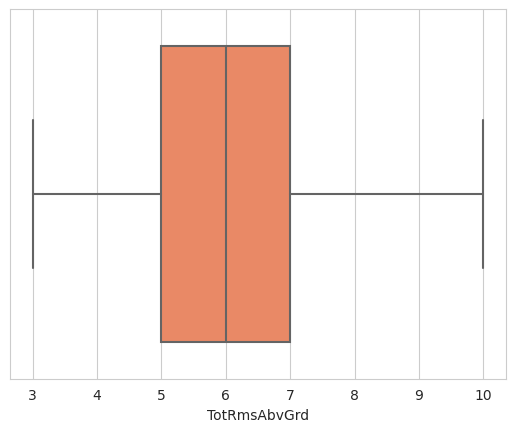

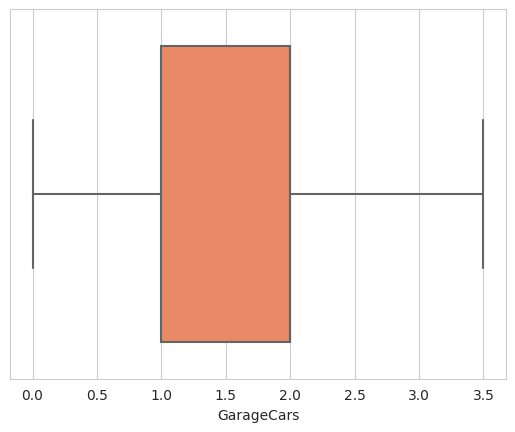

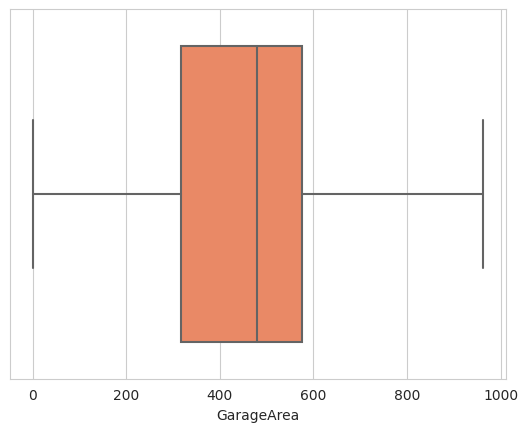

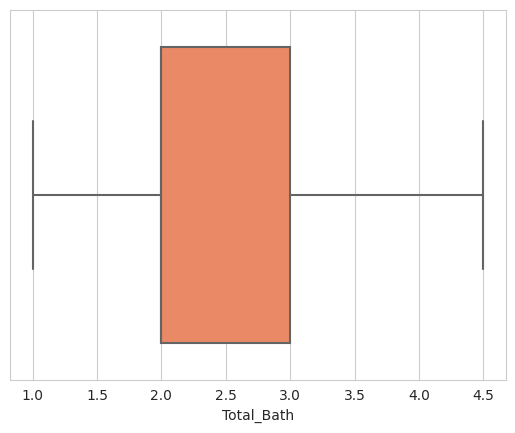

In [ ]:
# Test data outliers after capping
for i in df_test_new:
    sns.boxplot(x= df_test_new[i],color = 'coral')
    plt.xlabel(i)
    plt.show()

**Spliting the data into train and test**

In [81]:
df_X = df_new.drop('SalePrice',axis= 1)
df_y = df_new['SalePrice']

In [84]:
x_train , x_test , y_train , y_test = train_test_split(df_X,df_Y,test_size=0.20,random_state= 21)

In [85]:
x_train.shape, x_test.shape,

((1168, 10), (292, 10))

In [86]:
y_train.shape, y_test.shape

((1168,), (292,))

In [87]:
sc =  StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
df_test_new = sc.transform(df_test_new)

**Model Build 1(Linear regression)**

In [88]:
from sklearn.linear_model import LinearRegression
model1 =LinearRegression()
model1.fit(x_train , y_train);

**Model Build 2 ( Random Forest Regression )**

In [89]:
model2= RandomForestRegressor(n_estimators = 1000, random_state=42)
model2.fit(x_train , y_train);

**Model Build 3 ( Deceision Tree Regression)**

In [90]:
model3 = DecisionTreeRegressor()
model3.fit(x_train , y_train)

DecisionTreeRegressor()

**Model Build 4 ( XGBoost Regressior)**

In [91]:
model4 = XGBRegressor(n_jobs = -1)
model4.fit(x_train , y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

**Cross Validation**

In [92]:

crvs_lr = cross_val_score(model1,df_X,df_Y,cv=20)
crvs_lr.mean().round(2)                                                            # Cross validation score of Linear Regression model(before outlier and sc-  0.79)

0.79

In [93]:
crvs_rf = cross_val_score(model2,df_X,df_Y,cv=20)
crvs_rf.mean().round(2)                                                            # Cross validation score of Random Forest Regression model(before outlier and sc- 0.83)

0.83

In [94]:
crvs_dt = cross_val_score(model3,df_X,df_Y,cv=20)                                  # Cross validation score of Decision Tree model(before outlier and s-  0.64)
crvs_dt.mean().round(2)

0.64

In [95]:
crvs_xg = cross_val_score(model4,df_X,df_Y,cv=20)                                 # Cross validation score of XGboost regressior model(before outlier and sc-  0.64)
crvs_dt.mean().round(2)

0.64

**Model Predict**

In [96]:
def model_metric(y_t,y_pr):
    print("mean_absolute_error: ",mean_absolute_error(y_t,y_pr))
    print("mean_squared_error: ",mean_squared_error(y_t,y_pr))
    print("r2 score: ",r2_score(y_t,y_pr))

In [98]:
predict1 = model1.predict(x_test)                                               # Linear Regression model predict
model_metric(y_test,predict1)


"""mean_absolute_error:  24051.336528342545
mean_squared_error:  1685272618.5560608
r2 score:  0.7513361310853501"""

mean_absolute_error:  23774.216602035605
mean_squared_error:  1577177670.6550498
r2 score:  0.7672856621340556


'mean_absolute_error:  24051.336528342545\nmean_squared_error:  1685272618.5560608\nr2 score:  0.7513361310853501'

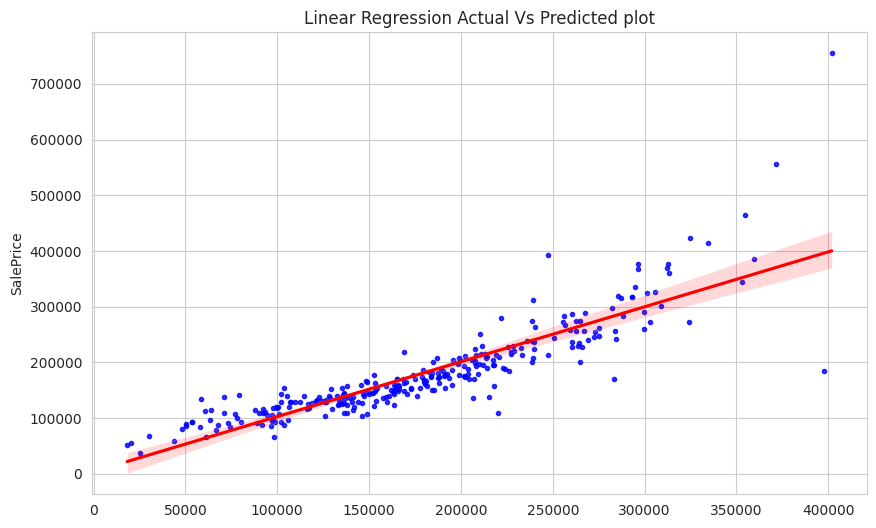

In [99]:
plt.figure(figsize=(10,6));
sns.regplot(x=predict1, y=y_test,marker=".",scatter_kws={"color": "blue"}, line_kws={"color": "red"});
plt.title("Linear Regression Actual Vs Predicted plot")
plt.show()

In [100]:
predict2 = model2.predict(x_test)                                               # Random Forest Regression model predict
model_metric(y_test,predict2)

"""mean_absolute_error:  19669.565841248725
mean_squared_error:  1575868922.274853
r2 score:  0.7674787694284316 before outliers an sc"""

mean_absolute_error:  19760.700327127324
mean_squared_error:  1606099483.6833608
r2 score:  0.7630182161170379


'mean_absolute_error:  19669.565841248725\nmean_squared_error:  1575868922.274853\nr2 score:  0.7674787694284316 before outliers an sc'

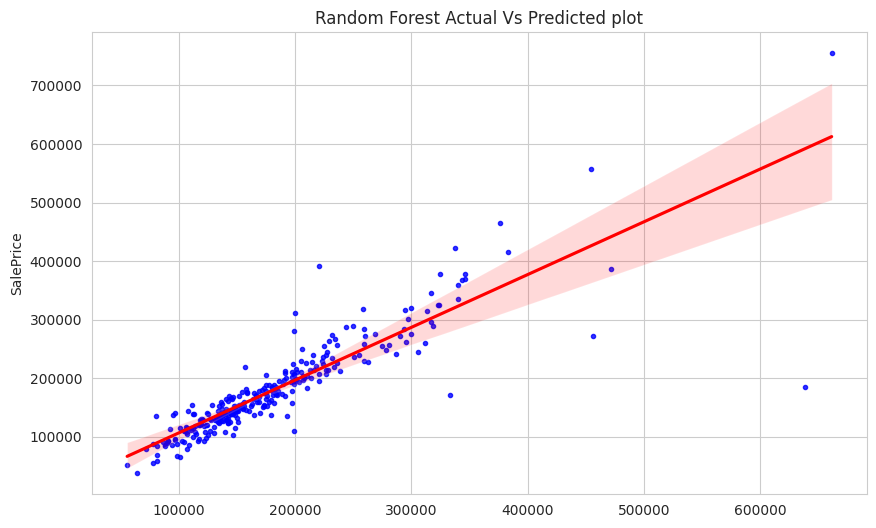

In [101]:
plt.figure(figsize=(10,6));
sns.regplot(x=predict2, y=y_test,marker=".",scatter_kws={"color": "blue"}, line_kws={"color": "red"});
plt.title("Random Forest Actual Vs Predicted plot")
plt.show()

In [102]:
predict3 = model3.predict(x_test)                                               # Random Forest Regression model predict
model_metric(y_test,predict3)


'''mean_absolute_error:  28609.58904109589
mean_squared_error:  2699070796.979452
r2 score:  0.6017490704699706'''

mean_absolute_error:  27327.38184931507
mean_squared_error:  2594673334.3125
r2 score:  0.6171530334168553


'mean_absolute_error:  28609.58904109589\nmean_squared_error:  2699070796.979452\nr2 score:  0.6017490704699706'

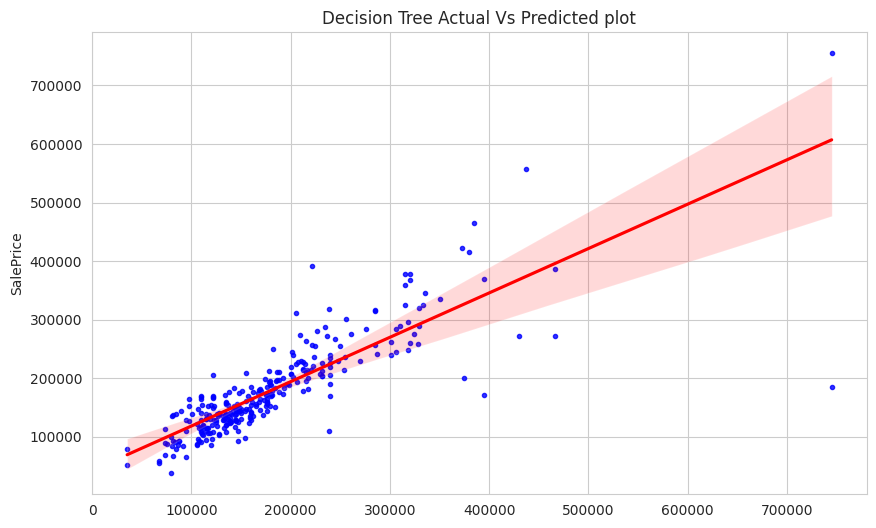

In [103]:
plt.figure(figsize=(10,6));
sns.regplot(x=predict3, y=y_test,marker=".",scatter_kws={"color": "blue"}, line_kws={"color": "red"});
plt.title("Decision Tree Actual Vs Predicted plot")
plt.show()

In [104]:
predict4 = model4.predict(x_test)                                               # Random Forest Regression model predict
model_metric(y_test,predict4)

'''mean_absolute_error:  20275.66184182363
mean_squared_error:  1343144368.8414967
r2 score:  0.8018175388423414'''

mean_absolute_error:  21147.511571596748
mean_squared_error:  1581351934.2887275
r2 score:  0.7666697448435288


'mean_absolute_error:  20275.66184182363\nmean_squared_error:  1343144368.8414967\nr2 score:  0.8018175388423414'

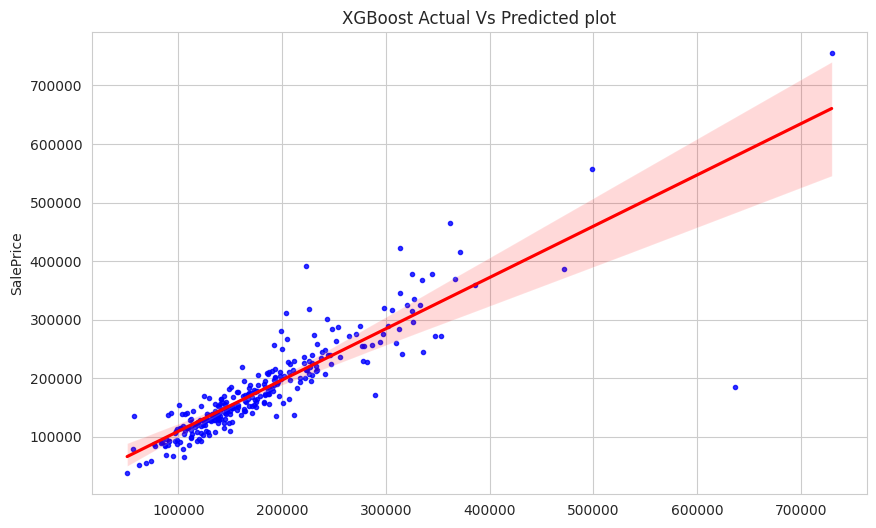

In [105]:
plt.figure(figsize=(10,6));
sns.regplot(x=predict4, y=y_test,marker=".",scatter_kws={"color": "blue"}, line_kws={"color": "red"});
plt.title("XGBoost Actual Vs Predicted plot")
plt.show()

In [ ]:
'''with open ('RandomForest_model','wb')as x:
    pickle.dump(model2,x)'''